In [48]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from config import EDA_DATABASE_URL

In [49]:
# Connecting to database
conn = sqlite3.connect("user_data_spotify.db")

In [50]:
# Querying all the rows from "user_top_artists" table:
query = "SELECT * FROM user_top_artists;"
user_top_artists_df = pd.read_sql_query(query, conn)

user_top_artists_df.head()

,spotify_id,name,popularity
0,67lytN32YpUxiSeWlKfHJ3,Yung Lean,64
1,0epOFNiUfyON9EYx7Tpr6V,The Strokes,76
2,5M52tdBnJaKSvOpJGz8mfZ,Black Sabbath,73
3,1GLtl8uqKmnyCWxHmw9tL4,The Kooks,67
4,7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,86


In [51]:
# Sorting artists by their popularity (in descending order)
user_top_artists_df.sort_values(by="popularity", ascending=False, inplace=True)

[Text(0.5, 1.0, 'User top artists on Spotify ranked by their popularity')]

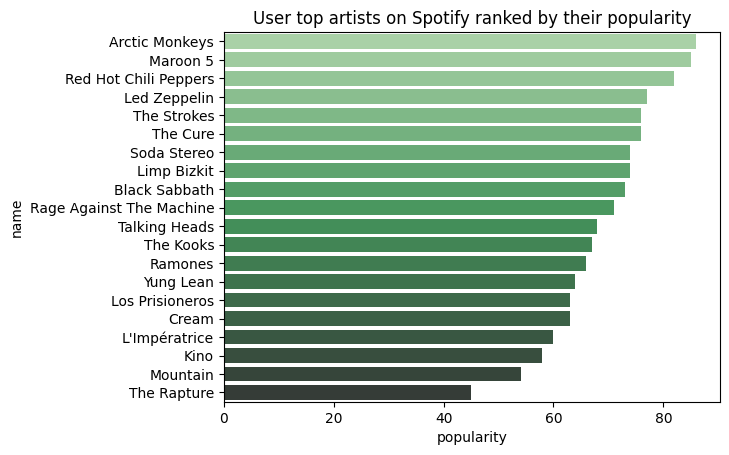

In [52]:
# Plotting the user top artists data using a barplot
sns.barplot(data=user_top_artists_df, x=user_top_artists_df["popularity"], y=user_top_artists_df["name"], palette="Greens_d").set(title="User top artists on Spotify ranked by their popularity")

In [53]:
# Querying all the rows form "user_top_tracks" table
query = """
SELECT *
FROM user_top_tracks;
"""

user_top_tracks_df = pd.read_sql_query(query, conn)

user_top_tracks_df.head()

,track_id,name,popularity,duration_ms,key,tempo
0,250dZY8xYbhHGQpM6bgL52,In The City,56,137800,G,177.138
1,2VhJ4nrPorAbySEgO4V0BS,Soñé - En Vivo,76,226627,D,83.000
2,3bmdzcKPdbP32AUUF9hQUP,Eighties,46,231133,D,151.716
3,0TI8TP4FitVPoEHPTySx48,Iron Man,74,354774,A,157.378
4,59WN2psjkt1tyaxjspN8fp,Killing In The Name,82,313573,G,88.785


In [54]:
# Getting descriptive statistics from user top tracks
user_top_tracks_df.describe()

,popularity,duration_ms,tempo
count,20.000000,20.000000,20.000000
mean,65.400000,262070.200000,124.063900
std,17.199755,89430.957277,30.558707
min,28.000000,137800.000000,81.931000
25%,52.750000,198573.250000,94.852250
50%,69.500000,244586.500000,125.102000
75%,81.250000,328348.750000,142.714500
max,87.000000,474400.000000,177.138000


In [55]:
# Sorting tracks by their popularity
user_top_tracks_df.sort_values(by="popularity", ascending=False, inplace=True)

[Text(0.5, 1.0, 'User top tracks on Spotify ranked by their popularity')]

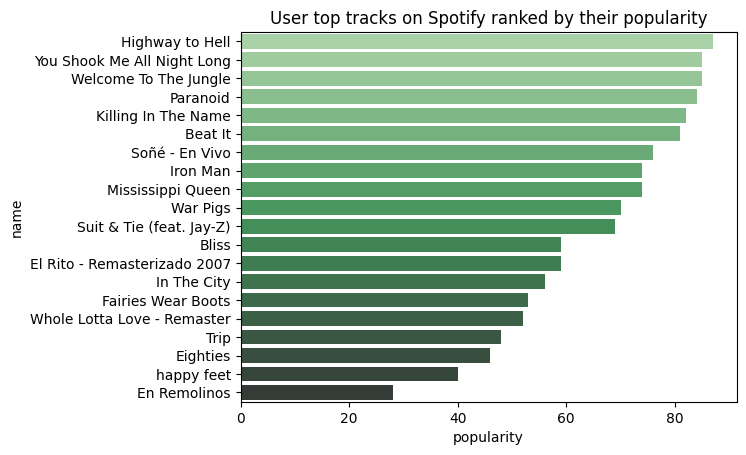

In [56]:
# Plotting user top tracks
sns.barplot(data=user_top_tracks_df, x=user_top_tracks_df["popularity"], y=user_top_tracks_df["name"], palette="Greens_d").set(title="User top tracks on Spotify ranked by their popularity")

[Text(0.5, 1.0, 'Distribution of user top tracks tempos')]

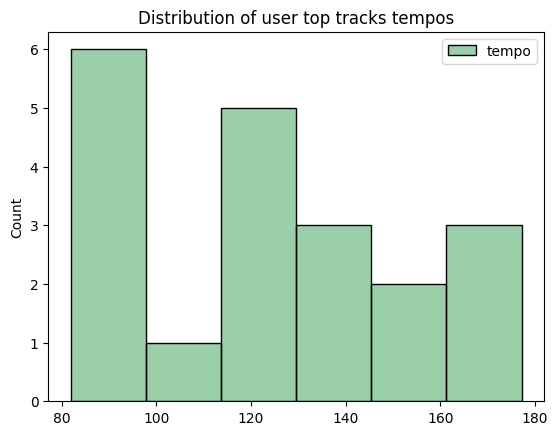

In [57]:
track_tempos_df = user_top_tracks_df[["name", "tempo"]]

sns.histplot(data=track_tempos_df, bins="auto", palette="Greens_d").set(title="Distribution of user top tracks tempos")

Text(0.5, 1.0, 'Distribution of keys from user top tracks')

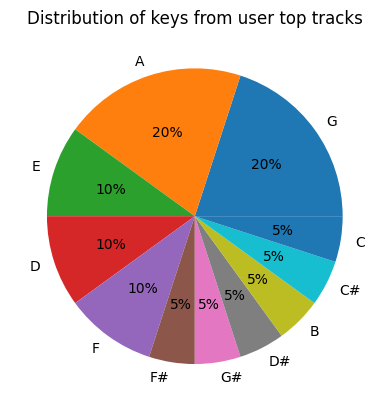

In [58]:
track_keys = user_top_tracks_df["key"].value_counts()

keys = track_keys.keys()

plt.pie(track_keys, labels=keys, autopct='%.0f%%')
plt.title("Distribution of keys from user top tracks")